In [1]:
import pandas as pd

auto = pd.read_csv('../data/Auto.csv')

auto = auto[auto.horsepower != '?']

X = auto.iloc[:, 0:8]
X = X.astype({'horsepower': 'float'})

y = auto.iloc[:, 8:9]
y = pd.DataFrame(y.name.str.split(' ', 1).tolist(), columns=['make', 'remaining'])
y = y.drop('remaining', axis=1)

In [2]:
X.head(3)

X.horsepower.astype(float)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
       ...  
367     88.0
368     88.0
369     88.0
370     85.0
371     84.0
372     90.0
373     92.0
374     74.0
375     68.0
376     68.0
377     63.0
378     70.0
379     88.0
380     75.0
381     70.0
382     67.0
383     67.0
384     67.0
385    110.0
386     85.0
387     92.0
388    112.0
389     96.0
390     84.0
391     90.0
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 392, dtype: float64

In [3]:
y.head(3)

,make
0,chevrolet
1,buick
2,plymouth


In [4]:
y.describe()

,make
count,392
unique,37
top,ford
freq,48


In [5]:
y['make'].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
vw                6
subaru            4
opel              4
saab              4
chevy             3
renault           3
bmw               2
mercedes-benz     2
cadillac          2
maxda             2
chevroelt         1
vokswagen         1
toyouta           1
triumph           1
hi                1
capri             1
mercedes          1
nissan            1
Name: make, dtype: int64

In [6]:
y['group'] = y['make']
most_freq_makes = ['ford', 'chevrolet', 'plymouth']
y.loc[~y.make.isin(most_freq_makes), 'group'] = 'others'
y = y.drop('make', axis=1)
y.head(3)

,group
0,chevrolet
1,others
2,plymouth


In [7]:
y['group'].value_counts()

others       270
ford          48
chevrolet     43
plymouth      31
Name: group, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## 9 different classification algorithms

+ **Decision tree -** sklearn.tree.DecisionTreeClassifier
+ **Random forest -** sklearn.ensemble.RandomForestClassifier
+ **XGBoost -** xgboost.XGBClassifier
+ **SVM -** sklearn.svm.SVC
+ **KNN -** sklearn.neighbors.KNeighborsClassifier
+ **SGD -** sklearn.linear_model.SGDClassifier
+ **Gaussian Naive Bayes -** sklearn.naive_bayes.GaussianNB
+ **Neural network -** sklearn.neural_network.MLPClassifer
+ **Gaussian Process -** sklearn.gaussian_process.GaussianProcessClassifer

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def run_model(model, model_name, plot_index):
    plot_index -= 1
    ax = axes[plot_index//3, plot_index%3]
    
    model.fit(X_train, y_train.values.reshape(-1, ))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    color_codes={'ford': 'blue', 'chevrolet': 'green', 'plymouth': 'red', 'others': 'gray'}
    
#     y_test.iloc[] and y_pred
    true_colors= [color_codes[c] for c in y_test.iloc[:, 0]]
    pred_colors= [color_codes[c] for c in y_pred]
    
    ax.scatter(X_test.iloc[:, 2], X_test.iloc[:, 3], color=true_colors, marker='.', label='Ground truth')
    ax.scatter(X_test.iloc[:, 2], X_test.iloc[:, 3], color=true_colors, facecolors='none', marker='o', label='Prediction')
    
    ax.legend(loc='lower right')
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')
    
    ax.set_title(model_name + ": Accuracy = " + str(round(accuracy, 4)))

C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


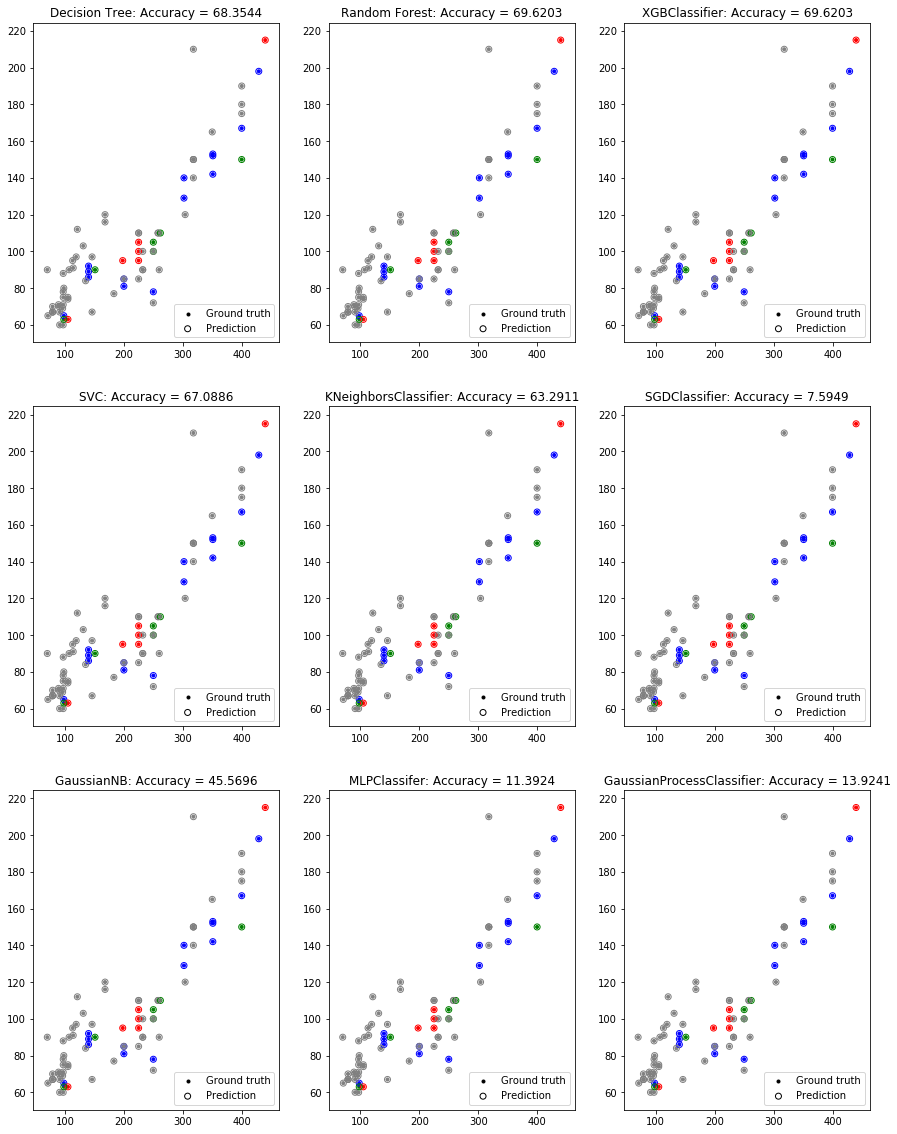

In [12]:
fig = plt.figure(figsize=(15, 20))
axes = fig.subplots(nrows=3, ncols=3)

# Decision tree  
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
run_model(model, "Decision Tree", 1)

# Random forest  
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest", 2)

# XGBoost  
from xgboost import XGBClassifier
model = XGBClassifier()
run_model(model, "XGBClassifier", 3)

# SVM  
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVC", 4)

# KNN  
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
run_model(model, "KNeighborsClassifier", 5)

# SGD  
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
run_model(model, "SGDClassifier", 6)

# Gaussian Naive Bayes  
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
run_model(model, "GaussianNB", 7)

# Neural network  
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
run_model(model, "MLPClassifer", 8)

# Gaussian Process  
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier()
run_model(model, "GaussianProcessClassifier", 9)
